<a href="https://colab.research.google.com/github/ThanhHung2112/Machine_learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings

# figuer 
%matplotlib inline
sns.set(rc={'figure.figsize':(13, 7.5)})

In [19]:
  df = pd.read_csv('/content/turtles.csv', sep="\t")   

In [15]:
df.head()

,ID,Sex,length,width,height
0,T25,F,98,81,38
1,T26,F,103,84,38
2,T27,F,103,86,42
3,T28,F,105,86,40
4,T29,F,109,88,44


#Data Visualization


In [39]:
# dependencies between values

print('Table of values showing dependencies :')
data_corr = df.corr()
data_corr

Table of values showing dependencies :


,length,width,height
length,1.000000,0.978312,0.964695
width,0.978312,1.000000,0.960571
height,0.964695,0.960571,1.000000


<AxesSubplot:>

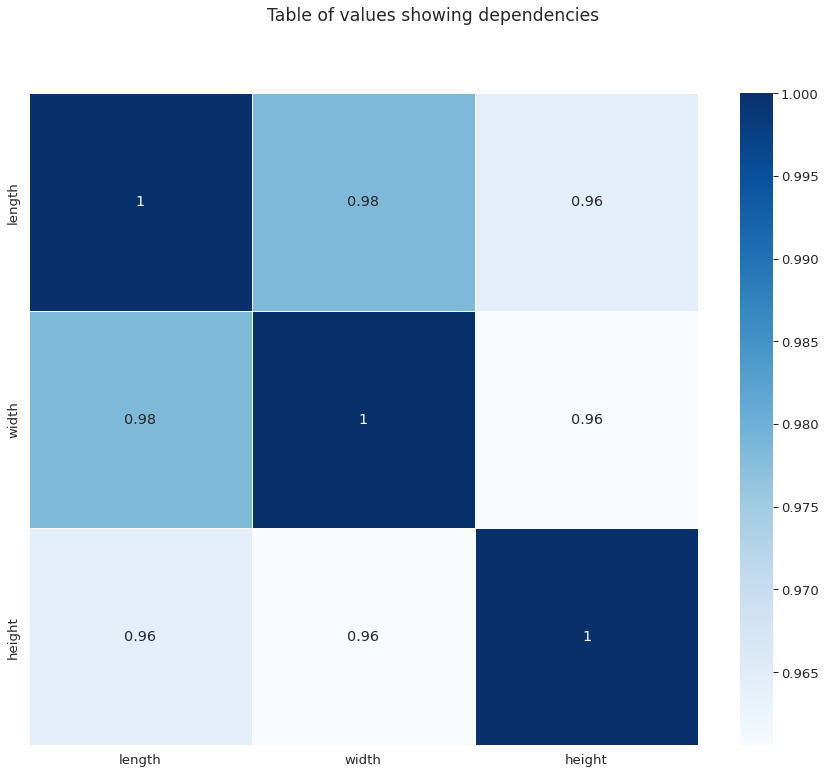

In [43]:
plt.figure(figsize=(15,12))
sns.set_context('paper', font_scale=1.5)
plt.suptitle('Table of values showing dependencies')
sns.heatmap(data_corr, annot=True, cmap='Blues',  linewidths=0.5, linecolor='white') #

In [34]:
def create_table(colname):
    x = pd.DataFrame(df.groupby(colname)[colname].count())
    x.columns = ['Số lượng']
    return x

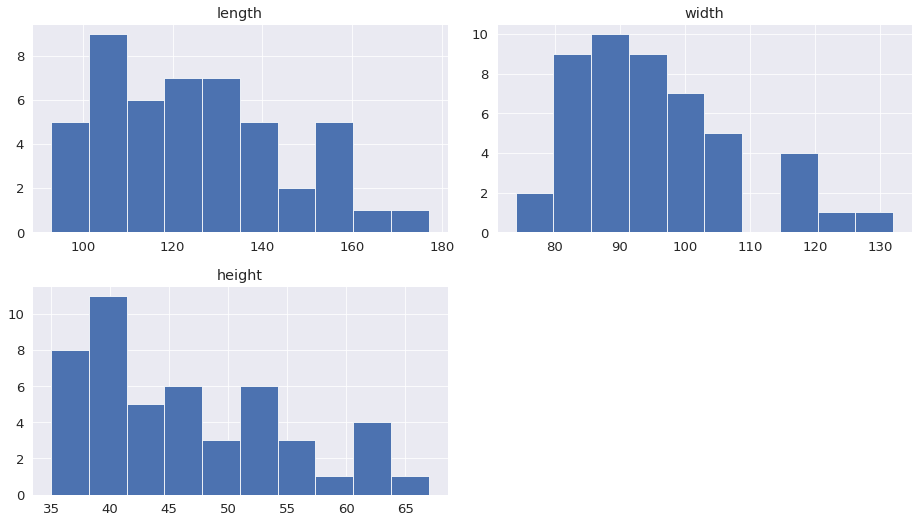

In [44]:
# All Quantitative variable histogram
quantitative = ["length", "width", "height"]
df[quantitative].hist()
plt.tight_layout()

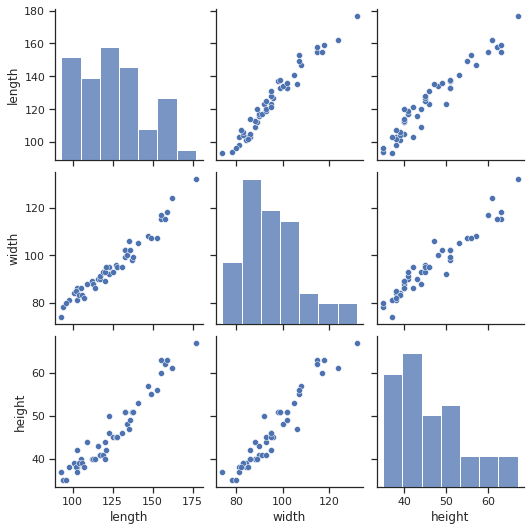

<Figure size 576x576 with 0 Axes>

<Figure size 260x150 with 0 Axes>

In [46]:
sns.set_theme(style="ticks")
sns.color_palette("hls", 8)
sns.pairplot(df[quantitative])
plt.figure(figsize=(8,8))
plt.figure(dpi=20)
plt.show()

Text(0.5, 0.98, 'Kiểm tra Chiều cao và Độ lớn mai rùa của hai giới tính')

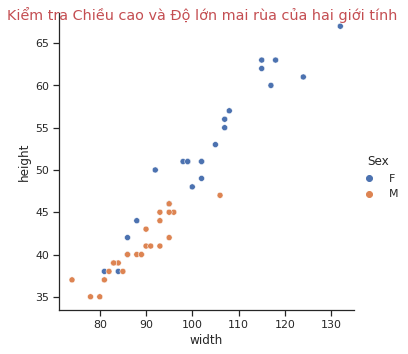

In [51]:
sns.relplot(data=df , x="width", y="height", hue=df['Sex'],kind='scatter')
plt.suptitle('Kiểm tra Chiều cao và Độ lớn mai r của hai giới tính', color = 'r')

Text(0.5, 0.98, 'Kiểm tra Length và width của hai giới tính')

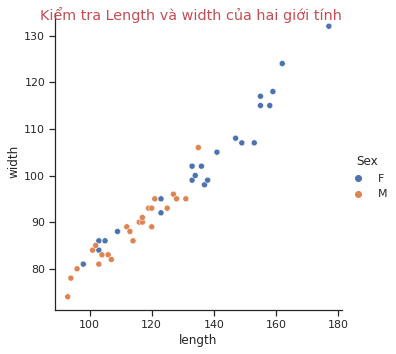

In [57]:
sns.relplot(data=df , x="length", y="width", hue=df['Sex'],kind='scatter')
plt.suptitle('Kiểm tra Length và width của hai giới tính', color = 'r')

# Data Scaling
Công thức: **z = (x - u)/ s**

u: Giá trị trung bình mẫu hoặc u = 0

In [27]:
features = ["length", "width", "height"]
x = df.loc[:, features].values  # Dùng các trường dữ liệu định lượng 

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    x = StandardScaler().fit_transform(x)
    dfnew = pd.DataFrame(x, columns=features) 

In [28]:
dfnew.head() # Bảng dữ liệu mới

,length,width,height
0,-1.316787,-1.151031,-1.003417
1,-1.070083,-0.911856,-1.003417
2,-1.070083,-0.752406,-0.521777
3,-0.971401,-0.752406,-0.762597
4,-0.774037,-0.592955,-0.280957


In [30]:
for feature in features:
    print(f"{feature} trung bình: {np.average(dfnew[feature])} Độ lệch chuẩn: {np.std(dfnew[feature])}")

length trung bình: -1.850371707708594e-17 Độ lệch chuẩn: 1.0
width trung bình: 0.0 Độ lệch chuẩn: 1.0
height trung bình: -2.7755575615628914e-16 Độ lệch chuẩn: 1.0


Bây giờ có thể thấy các thuộc tính có giá trị trung bình là 0, Độ lệch chuẩn là 1

# Thuật toán PCA

In [54]:
n_components = 2
whiten = True

pca = PCA(n_components=n_components, whiten=whiten)
PC = pca.fit_transform(x)

dfPC = pd.DataFrame(PC, columns=["PC1", "PC2"])
dfPC["Sex"] = df["Sex"] 

dfPC.head()

,PC1,PC2,Sex
0,-1.157738,0.807548,F
1,-0.995436,-0.128592,F
2,-0.782197,1.374335,F
3,-0.829218,0.285269,F
4,-0.550007,1.481525,F
